# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objectives

At the end of the experiment, you will be able to:


*  Apply to Leave - one - out method
*  Tune the hyperparameters of MLP Classifier.

## Dataset

### Description

The MNIST dataset contains :

1. 60,000 Handwritten digits as training samples and 10,000 Test samples, 
which means each digit occurs 6000 times in the training set and 1000 times in the testing set. (approximately). 
2. Each image is Size Normalized and Centered 
3. Each image is 28 X 28 Pixel with 0-255 Gray Scale Value. 
4. That means each image is represented as 784 (28 X28) dimension vector where each value is in the range 0- 255.



### History

Yann LeCun (Director of AI Research, Facebook, Courant Institute, NYU) was given the task of identifying the cheque numbers (in the ’90s) and the amount associated with that cheque without manual intervention. That is when this dataset was created which raised the bars and became a benchmark.

Yann LeCun and Corinna Cortes (Google Labs, New York) hold the copyright of the MNIST dataset, which is a subset of the original NIST datasets. This dataset is made available under the terms of the Creative Commons Attribution-Share Alike 3.0 license.

It is the handwritten digits dataset in which half of them are written by the Census Bureau employees and remaining by the high school students. The digits collected among the Census Bureau employees are easier and cleaner to recognize than the digits collected among the students.


### Challenges

Now, if you notice the images below, you will find that between 2 characters there are always certain similarities and differences. To teach a machine to recognize these patterns and identify the correct output.

![altxt](https://www.researchgate.net/profile/Radu_Tudor_Ionescu/publication/282924675/figure/fig3/AS:319968869666820@1453297931093/A-random-sample-of-6-handwritten-digits-from-the-MNIST-data-set-before-and-after.png)

Hence, all these challenges make this a good problem to solve in Machine Learning.


## AI / ML Technique

#### Leave One Out

Leave One Out is a special form of Cross-Validation. In this method, each sample is used once as a test set while the remaining samples for the training set. A generalization error estimate is obtained by repeating this procedure for each of the training points available, averaging the results.

## Setup Steps

#### Importing the packages

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

In [0]:
import warnings
warnings.simplefilter('default')

**Loading the dataset from sklearn package </br>
NOTE: We are using only 3 classes because Leave-one-out training would take a huge time if all the 10 classes were considered**

In [0]:
## Loading the dataset (n_class variable defines the number of classes to choose)
digits = datasets.load_digits(n_class=3)

## Storing the data in 'X'
X = digits.data
## Storing the target data into 'y'
y = digits.target

In [0]:
# Checking for the shape of 'X'
X.shape

(537, 64)

In [0]:
len(X[0]), X[0]

(64, array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]))

In [0]:
# Creating the LeaveOneOut object
loo = LeaveOneOut()
# Returns the number of splitting iterations in the cross-validator
loo.get_n_splits(X)

537

In [0]:
for a,(b,c) in enumerate(loo.split(X[0])):
  print (a,b,c)

0 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63] [0]
1 [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63] [1]
2 [ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63] [2]
3 [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63] [3]
4 [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63] [4]
5 [ 0

### Hyper parameters

In [0]:
# Activation functions
a = ["identity","logistic","tanh","relu"]

# Solvers (Optimizers)
s = ["lbfgs","sgd","adam"]

# Learning rate
lr = [0.0001,0.001,0.1]

# Hidden Layers and number of nodes in each layer
h = [(5,2),(3,2),(6,3),(7,2)]

In [0]:
# Function to Create MLP classifier object with hyper parameters
def mlp(a,s,h,lr):
    clf = MLPClassifier(activation= a,solver= s,hidden_layer_sizes = h,learning_rate_init=lr)
    return clf 
# Function to calculate the accuracy
def accuracy(actual,predicted):
    return accuracy_score(actual,predicted)

### Calculating Training and Testing accuracies 
* You may ignore the warning below as they are internal to the Sklearn's config and not related to the data
* The training using LOO below would take 25 mins to complete the execution for obvious reasons. (which is that we are considering each sample as a potential test sample)

In [0]:
#from sklearn import preprocessing

warnings.simplefilter('default')
test_accuracy = []
train_accuracy = []
for i in range(5):
    k1 = np.random.randint(0,len(a))
    k2 = np.random.randint(0,len(s))
    k3 = np.random.randint(0,len(lr))
    k4 = np.random.randint(0,len(h))
    print("\nHyper-parameters = \n activation = ", a[k1],    "\n solver = ", s[k2], "\n learning_rate_init = ", lr[k3],         "\n hidden_layer_sizes = ", h[k4])
    # Calling the mlp function with random hyper paramters
    clf = mlp(a[k1],s[k2],h[k4],lr[k3])
    tempTrain = 0
    tempTest = 0
    for nbrOfSamples,(train_index, test_index) in enumerate(loo.split(X)):
    ## Splitting the data into train and test
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = y[train_index], y[test_index]
        #X_train_Std = preprocessing.StandardScaler().fit_transform(X_train)
        #X_test_Std = preprocessing.StandardScaler().fit_transform(X_test)
        ## Fit the data into the model
        clf.fit(X_train,Y_train)
        ## Predicting the values on the fitted model
        predTrain = clf.predict((X_train))
        ## Calculating the train accuracy
        tempTrain = tempTrain + accuracy(Y_train,predTrain)
        ## Predict the values on the fitted model using test data
        predTest = clf.predict((X_test))
        ## Calculating the test accuracy
        tempTest = tempTest + accuracy(Y_test,predTest)
    ## Calculating the train accuracy
    print("nbr of samples", nbrOfSamples+1)
    train_accuracy.append(tempTrain*1.0/(nbrOfSamples+1))
    ## Calculating the test accuracy
    test_accuracy.append(tempTest*1.0/(nbrOfSamples+1))
    print("===========")
    print("(train,test) accuracy = ",tempTrain*1.0, tempTest*1.0)


Hyper-parameters = 
 activation =  tanh 
 solver =  lbfgs 
 learning_rate_init =  0.1 
 hidden_layer_sizes =  (6, 3)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

nbr of samples 537
(train,test) accuracy =  517.3544776119411 509.0

Hyper-parameters = 
 activation =  tanh 
 solver =  adam 
 learning_rate_init =  0.1 
 hidden_layer_sizes =  (3, 2)
nbr of samples 537
(train,test) accuracy =  338.3041044776123 332.0

Hyper-parameters = 
 activation =  relu 
 solver =  adam 
 learning_rate_init =  0.1 
 hidden_layer_sizes =  (6, 3)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


nbr of samples 537
(train,test) accuracy =  258.21268656716387 232.0

Hyper-parameters = 
 activation =  tanh 
 solver =  sgd 
 learning_rate_init =  0.1 
 hidden_layer_sizes =  (5, 2)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


nbr of samples 537
(train,test) accuracy =  496.99626865671655 494.0

Hyper-parameters = 
 activation =  identity 
 solver =  adam 
 learning_rate_init =  0.0001 
 hidden_layer_sizes =  (5, 2)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


nbr of samples 537
(train,test) accuracy =  376.1623134328357 362.0


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


#### Plotting the data

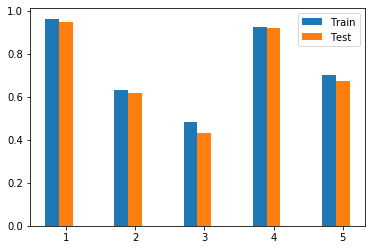

In [0]:
xx = np.array(range(1,6))
plt.bar(xx-0.2,train_accuracy,width=0.2)
plt.bar(xx, test_accuracy,width=0.2)
plt.legend(["Train","Test"])
plt.show()

In [0]:
train_accuracy, test_accuracy

([0.9634161594263335,
  0.6299890213735797,
  0.48084299174518413,
  0.9255051557853194,
  0.7004884793907554],
 [0.9478584729981379,
  0.6182495344506518,
  0.43202979515828677,
  0.9199255121042831,
  0.6741154562383612])

#### Ungraded Exercise 1

vary the hidden layers, learning rate values  and observe the changes

In [0]:
## Loading the dataset (n_class variable defines the number of classes to choose)
df = datasets.load_digits(n_class=2)

## Storing the data in 'X'
X = df.data
#X = preprocessing.StandardScaler().fit_transform(X)
## Storing the target data into 'y'
y = df.target

In [0]:
X.shape

(360, 64)

In [0]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [0]:
warnings.simplefilter('default')
test_acc= []

a = 'relu'
s = 'lbfgs'
lr = 0.01
h = (4,3)
for i in range(5):
    print("\nHyper-parameters: \n activation = ", a,    "\n solver = ", s, "\n learning_rate_init = ", lr,         "\n hidden_layer_sizes = ", h)
    # Calling the mlp function with random hyper paramters
    clf = mlp(a,s,h,lr)
    accBuffer = 0

    for nbrOfSamples,(train_index, test_index) in enumerate(loo.split(X)):
    ## Splitting the data into train and test
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = y[train_index], y[test_index]
        ## Fit the data into the model
        clf.fit(X_train,Y_train)
        # Pred test accuracy
        predTest = clf.predict((X_test))
        ## Calculating the test accuracy
        accBuffer = accBuffer + accuracy(Y_test,predTest)
    ## Calculating the train accuracy
    print("nbr of samples", nbrOfSamples+1)
    ## Calculating the test accuracy
    test_acc.append(accBuffer*1.0/(nbrOfSamples+1))
    print("===========")
    print("test accuracy = ",accBuffer*1.0)


Hyper-parameters: 
 activation =  relu 
 solver =  lbfgs 
 learning_rate_init =  0.01 
 hidden_layer_sizes =  (4, 3)
nbr of samples 360
test accuracy =  329.0

Hyper-parameters: 
 activation =  relu 
 solver =  lbfgs 
 learning_rate_init =  0.01 
 hidden_layer_sizes =  (4, 3)
nbr of samples 360
test accuracy =  324.0

Hyper-parameters: 
 activation =  relu 
 solver =  lbfgs 
 learning_rate_init =  0.01 
 hidden_layer_sizes =  (4, 3)
nbr of samples 360
test accuracy =  324.0

Hyper-parameters: 
 activation =  relu 
 solver =  lbfgs 
 learning_rate_init =  0.01 
 hidden_layer_sizes =  (4, 3)
nbr of samples 360
test accuracy =  331.0

Hyper-parameters: 
 activation =  relu 
 solver =  lbfgs 
 learning_rate_init =  0.01 
 hidden_layer_sizes =  (4, 3)
nbr of samples 360
test accuracy =  325.0


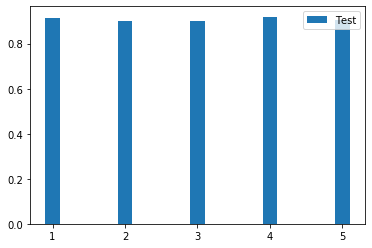

In [0]:
i = np.array(range(1,6))
plt.bar(i, test_acc ,width=0.2)
plt.legend(["Test"])
plt.show()